In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [5]:
df1 = df.copy()

In [6]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
df1[df1.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


E:\softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


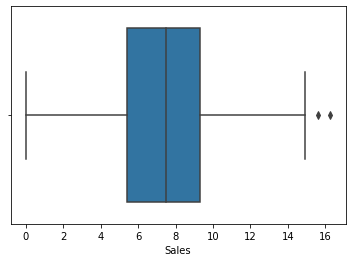

In [10]:
ax = sns.boxplot(df1['Sales'])

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


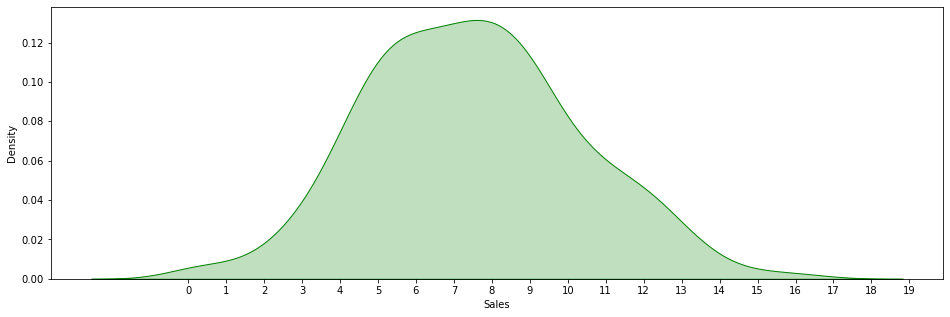

In [12]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [13]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

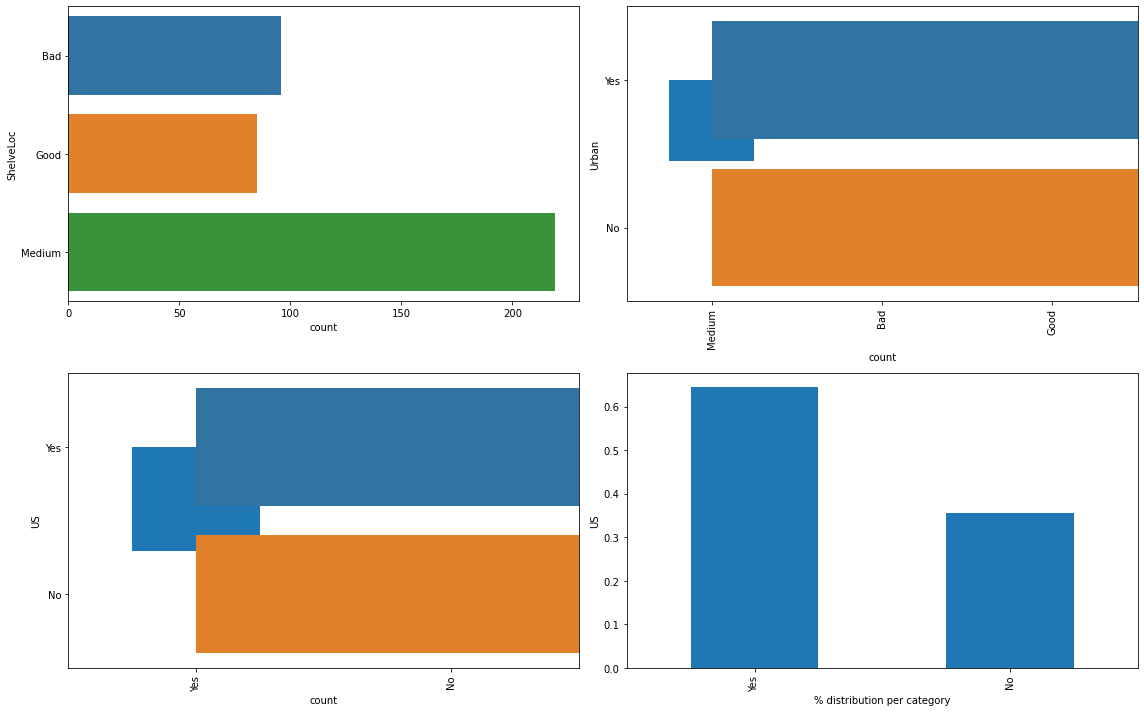

In [14]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [15]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

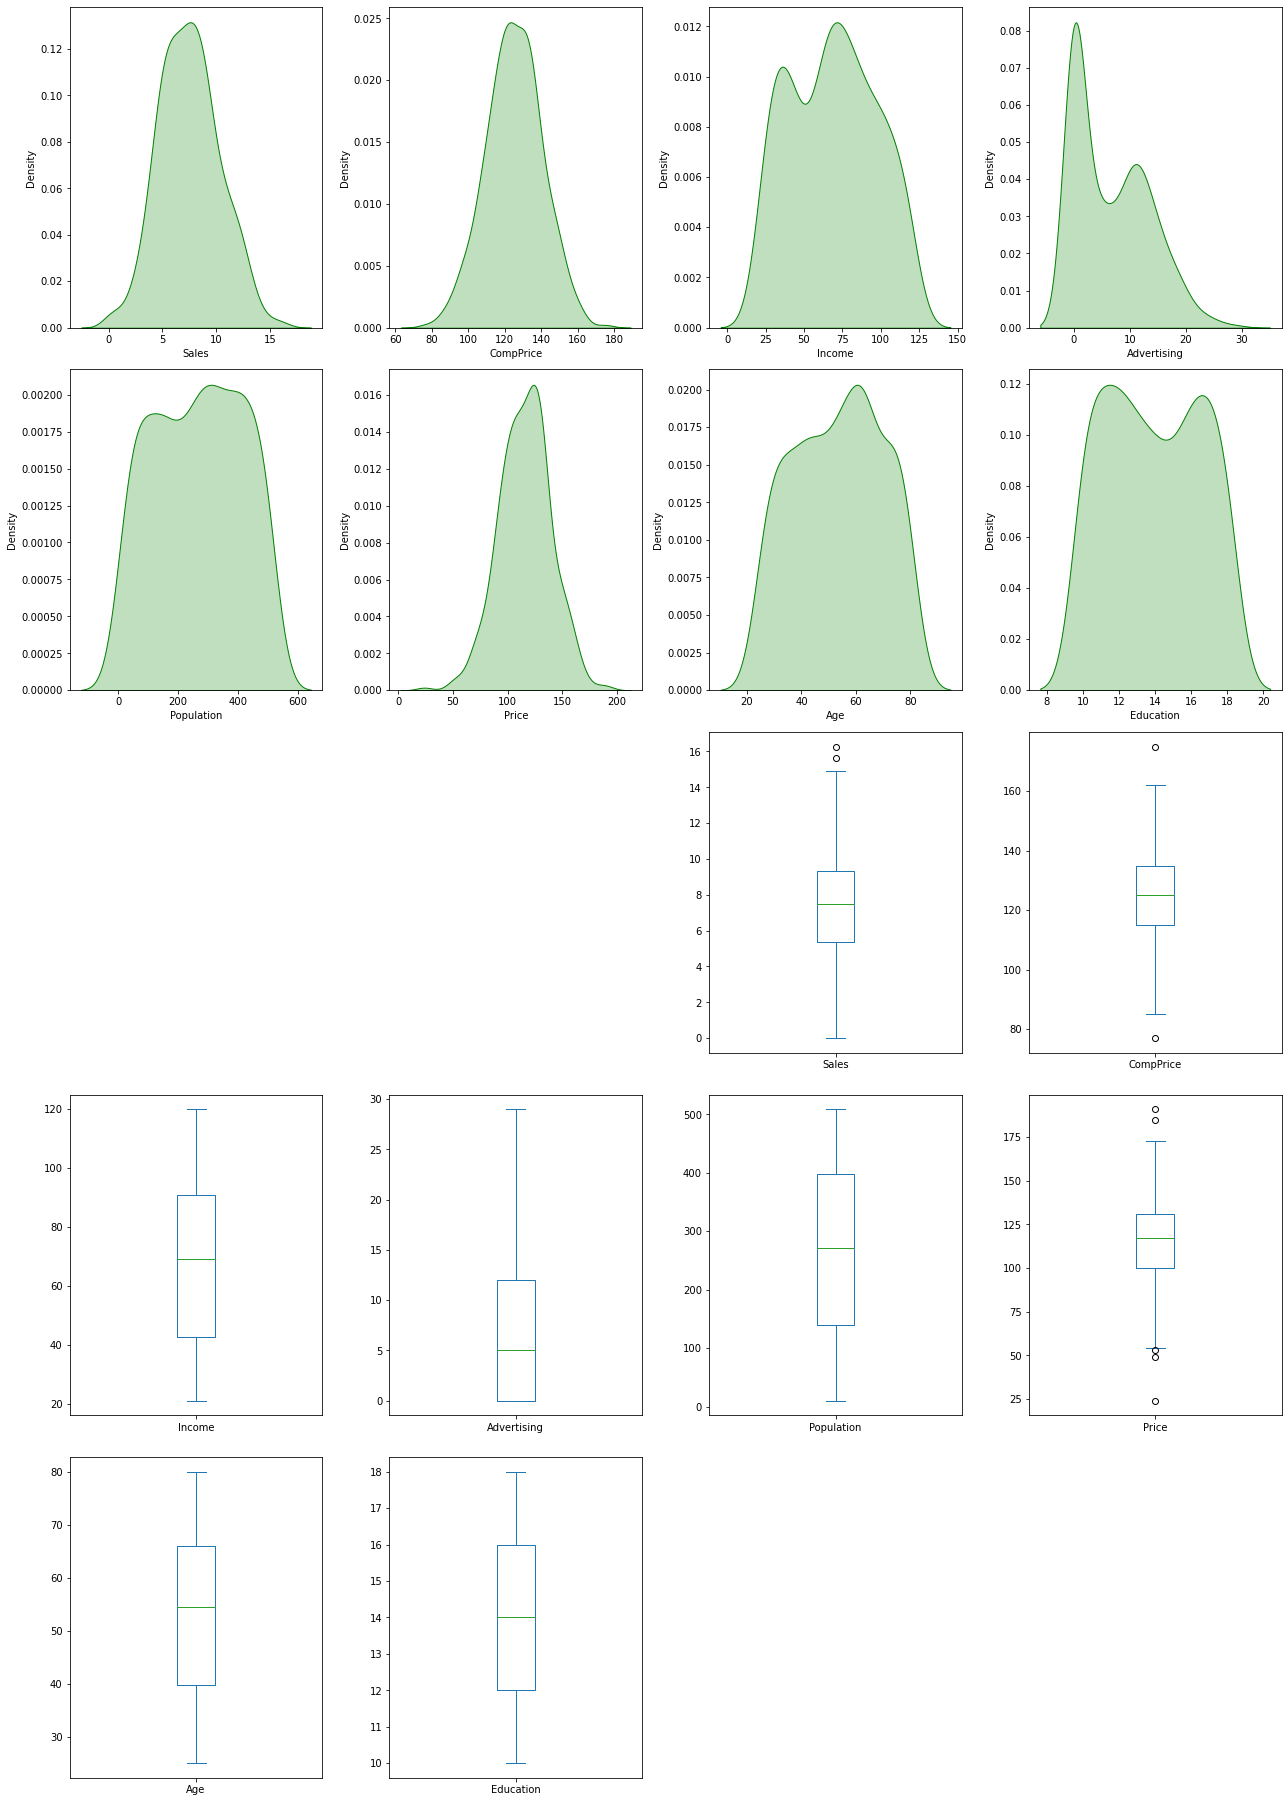

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [16]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [17]:
corr = df1.corr()

In [18]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [19]:
corr = df1.corr()

<AxesSubplot:>

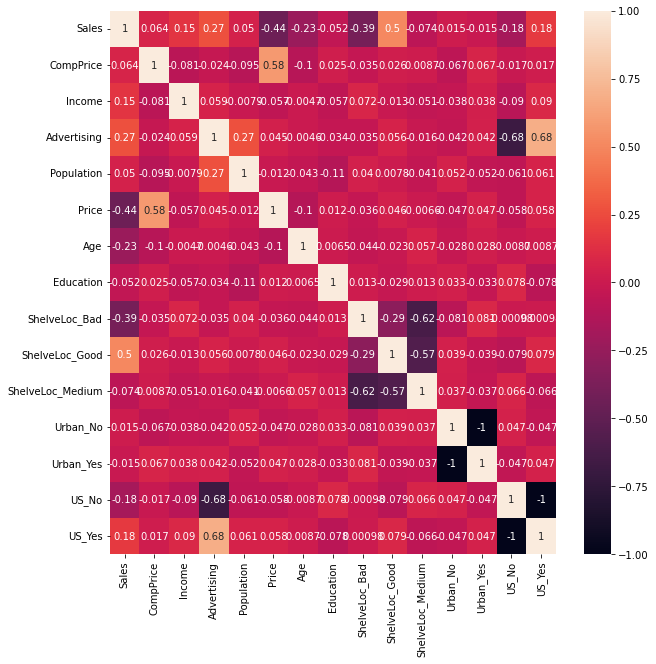

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [21]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [22]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify = y)

In [24]:
y_train.value_counts()

small    141
large    139
Name: sales, dtype: int64

In [25]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
pred_train = model.predict(x_train)

In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[139,   0],
       [  0, 141]], dtype=int64)

In [29]:
pred_test = model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.7166666666666667

In [31]:
confusion_matrix(y_test,pred_test)

array([[45, 15],
       [19, 41]], dtype=int64)

In [34]:
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

In [36]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
predictions = tree.predict(x_test)
np.mean(predictions == y_test)

0.725

In [38]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [39]:
df_t

,Actual,Predicted
326,small,small
3,small,large
13,large,large
201,small,small
244,large,large
...,...,...
234,large,large
385,small,small
162,small,small
85,large,large


In [40]:
cols = list(df1.columns)

In [41]:
predictors = cols[0:14]
target = cols[14]

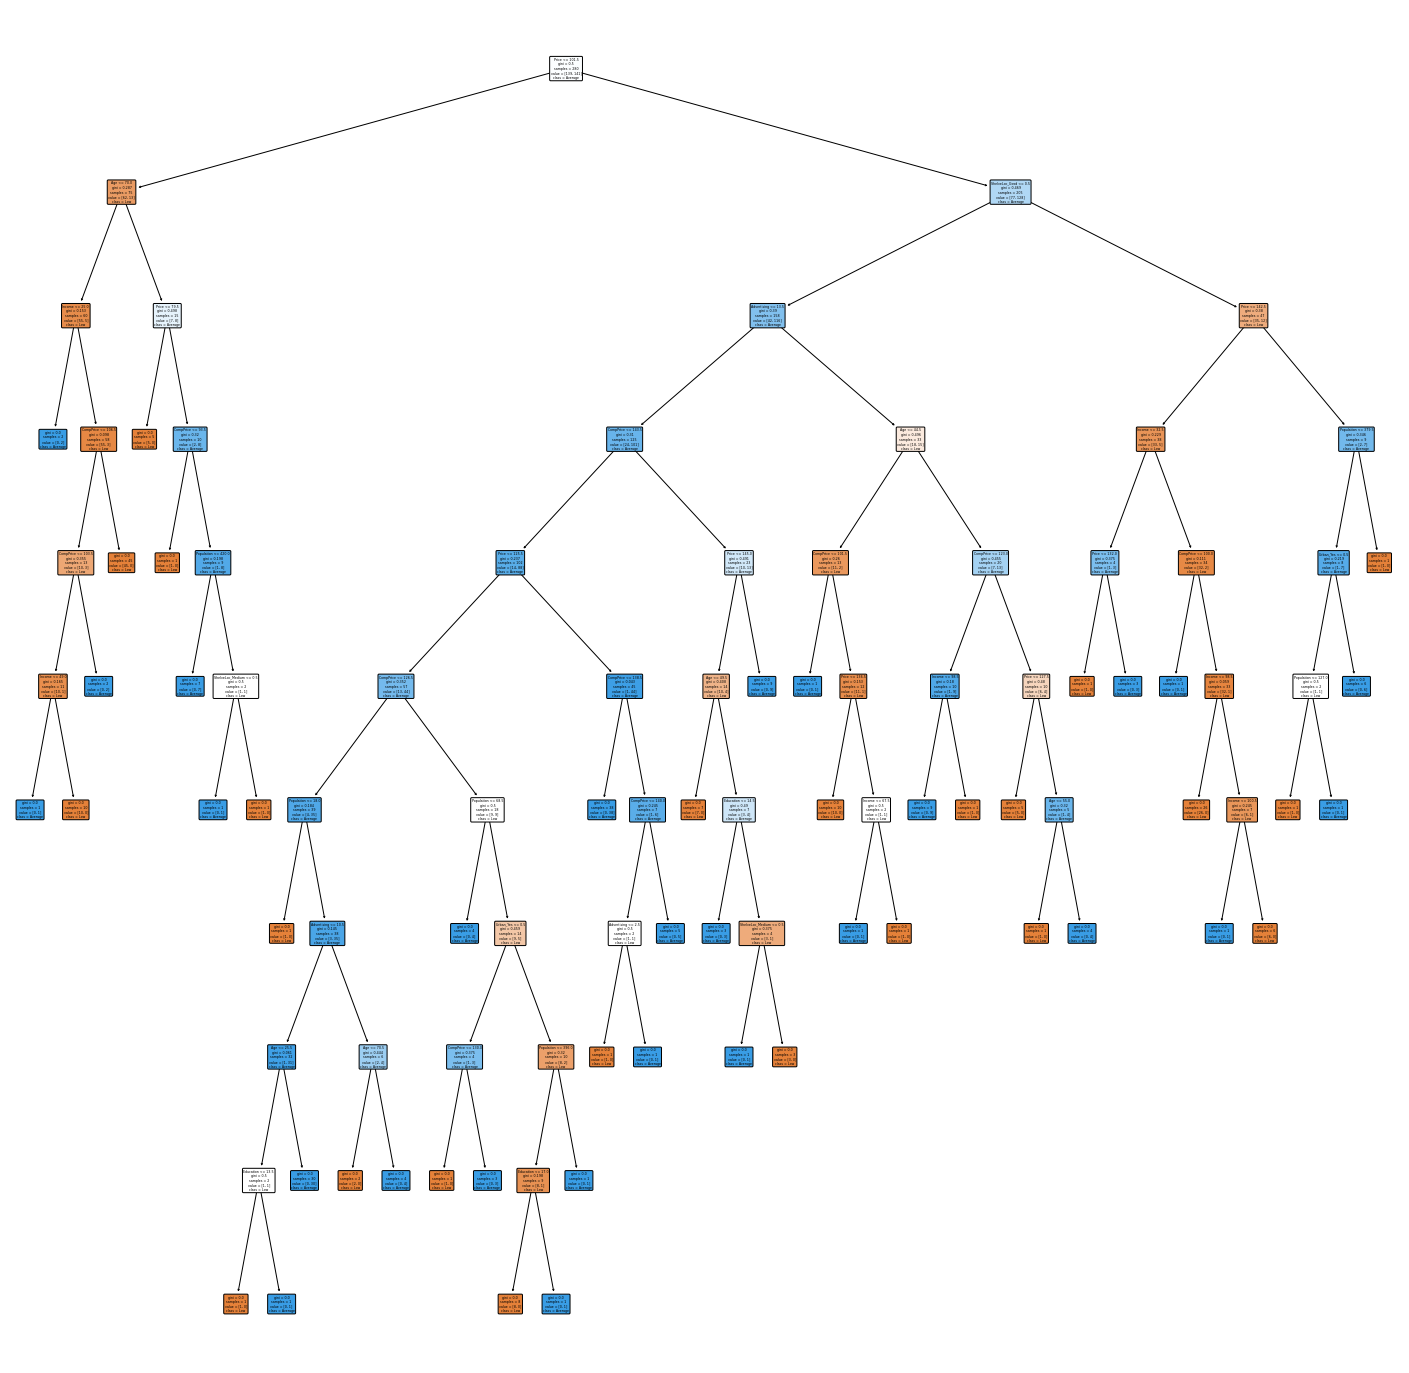

In [43]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25,25))
plot_tree(tree, filled = True, rounded = True, feature_names = X.columns, class_names = ['Low', 'Average', 'High'])
plt.show()

In [45]:
pruning = tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = pruning.ccp_alphas[:-1]
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion ='gini')
    tree.fit(x_train, y_train)
    trees.append(tree)
ccp_alphas

array([0.        , 0.00232804, 0.003125  , 0.0031746 , 0.00327381,
       0.00345982, 0.0034632 , 0.00486111, 0.00507937, 0.00535714,
       0.00535714, 0.00535714, 0.00554029, 0.00571429, 0.00571429,
       0.00617347, 0.00624046, 0.00642857, 0.00649351, 0.00651897,
       0.00688776, 0.00691335, 0.00816327, 0.00918367, 0.01017857,
       0.01075325, 0.01221252, 0.0124179 , 0.01385365, 0.0152381 ,
       0.01591581, 0.01735714, 0.02170364, 0.02329732, 0.05933168])

In [46]:
train_scores = [tree.score(x_train, y_train) for tree in trees]
test_scores = [tree.score(x_test, y_test) for tree in trees]

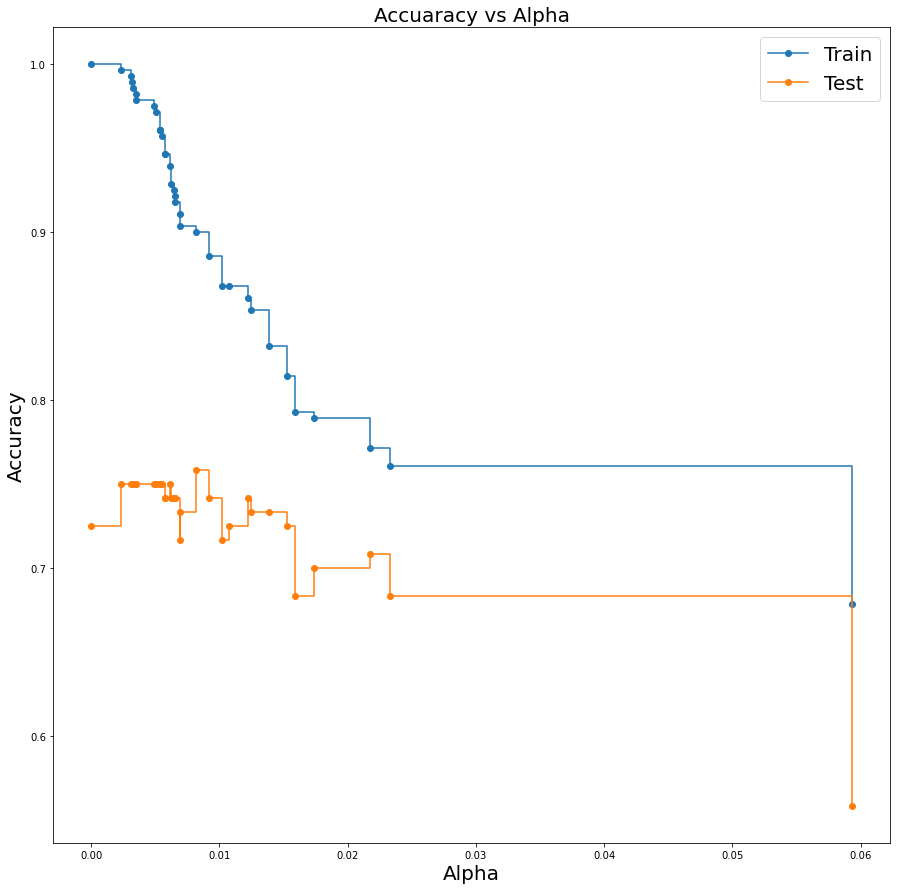

In [47]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, train_scores, drawstyle = 'steps-post', marker = 'o', label = 'Train' )
ax.plot(ccp_alphas, test_scores, drawstyle = 'steps-post', marker = 'o', label = 'Test')
ax.legend(fontsize = 20)
plt.show()

In [50]:
kfold = KFold(10)
alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha =  ccp_alpha)
    scores = cross_val_score(tree, x_train, y_train, cv = kfold)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.689286,0.103571
1,0.002328,0.689286,0.103571
2,0.003125,0.692857,0.104978
3,0.003175,0.692857,0.104978
4,0.003274,0.692857,0.104978
5,0.003460,0.692857,0.104978
6,0.003463,0.692857,0.104978
7,0.004861,0.707143,0.099488
8,0.005079,0.707143,0.099488
9,0.005357,0.714286,0.088928


<AxesSubplot:xlabel='alpha'>

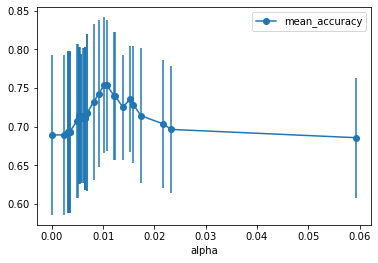

In [51]:
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')

In [54]:
accuracy_max = max(alpha_results['mean_accuracy'])
alpha_ideal = alpha_results[alpha_results['mean_accuracy'] == accuracy_max]

In [36]:
dot_data = StringIO()

In [37]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [38]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [40]:
model.feature_importances_

array([0.19015189, 0.08764023, 0.09842597, 0.06001105, 0.24728711,
       0.13966026, 0.05583323, 0.01263757, 0.09851345, 0.        ,
       0.        , 0.00983925, 0.        , 0.        ])

In [41]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [42]:
fi

,feature,importance
4,Price,0.247287
0,CompPrice,0.190152
5,Age,0.139660
8,ShelveLoc_Good,0.098513
2,Advertising,0.098426
1,Income,0.087640
3,Population,0.060011
6,Education,0.055833
7,ShelveLoc_Bad,0.012638
11,Urban_Yes,0.009839


Price is most important factor